Your project will be evaluated on following parameters -

Plots and graphs (Max Score 20)

Justification (Max Score 20)

Answer correctness (Max Score 10)


Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

The location where startups has received funding maximum number of times:- 
Bangalore


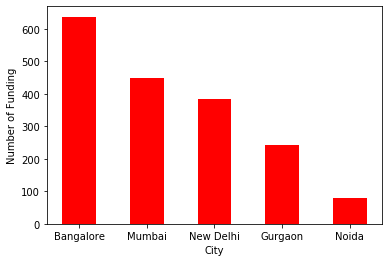

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#reading the csv file
df=pd.read_csv("startup_funding.csv") 
#removing the nan values
df.dropna(subset=['CityLocation'],inplace=True)
#replacing the case sensitive values of Bangalore
df['CityLocation'].replace("bangalore","Bangalore",inplace=True)
#replacing the Delhi to New Delhi
df['CityLocation'].replace("Delhi","New Delhi")
#create a series of city
df_city=df['CityLocation']
#empty dictonaries create
city={}
#transfer the 5 city name and there number of times funding in city dictonaries.
for i in df_city:
    if "Bangalore" in i:
        city['Bangalore']=city.get('Bangalore',0)+1
    elif "Mumbai" in i:
        city['Mumbai']=city.get('Mumbai',0)+1
    elif "New Delhi" in i:
        city['New Delhi']=city.get('New Delhi',0)+1
    elif "Noida" in i:
        city['Noida']=city.get('Noida',0)+1
    elif "Gurgaon" in i:
        city['Gurgaon']=city.get('Gurgaon',0)+1
#create a empty list
X=[]
Y=[]
#Appending the key in X and Values in Y lists
for i in city:
    X.append(i)
    Y.append(city[i])
#Print the maximum number of funding in city
print("The location where startups has received funding maximum number of times:- ")
print(max(city,key=city.get))

#ploting the Bar Graph
plt.bar(X,Y,width=0.5,color='red')
plt.xlabel("City")
plt.ylabel("Number of Funding")
plt.show()

Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import csv

#reading the csv file in file handling
with open("startup_funding.csv", encoding='utf8') as file_obj:
    file_data=csv.DictReader(file_obj, skipinitialspace=True)
    #empty list created
    investors=[]
    #transfer the all investors name in investors list by spliting by ','
    for row in file_data:
        for i in row['InvestorsName'].split(','):
            investors.append(i.strip())
    #create the empty dictonaries
    invest={}
    #transfer the data in key value pair where key is investor names and value is total times of investment 
    for i in investors:
        if i in invest:
            invest[i]+=1
        else:
            invest[i]=1
    #removing the empty key and Undisclosed Investors
    del invest['']
    del invest['Undisclosed Investors']
    del invest['Undisclosed investors']
    #finding the top five investors using Counter rom Collection by most_common method.
    max_invest=dict(Counter(invest).most_common(5))
#printing the top five investors with respect to their number of times invesment.
print('Top 5 investors:- ')
for i in max_invest:
    print(i,max_invest[i])

Top 5 investors:- 
Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

df=pd.read_csv("startup_funding.csv")
#removing row's having nan's in Investors name and startupnames columns..
df.dropna(subset = ["StartupName","InvestorsName"],inplace = True)
#replacing the wrong word with the correct one..
df['StartupName'].replace('FlipKart.com','Flipkart',inplace=True)
df["StartupName"].replace("Ola Cabs","Ola",inplace = True)
df["StartupName"].replace("Olacabs","Ola",inplace = True)
df["StartupName"].replace("Oyorooms","Oyo",inplace = True)
df["StartupName"].replace("OyoRooms","Oyo",inplace = True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace = True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace = True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace = True)

#firstly ...created a dictionary ...for each investor names ... maintained a set..means each key(investor's name) 
#having a value set(names of stratup's in which they invested)..
#set is taken as a value to avoid count of multiple investment in a single startup by an investor...
#in the set ..there are startup names in which investor's had invested...
#in case there are multiple investors for a single startup...used split function to split that ..and 
#traversed through each name separately...

d = {}
for i in df.index:
    e = df["InvestorsName"][i].strip()
    if "," in e:
        for j in e.strip().split(','):
            if j.strip() in d:
                d[j.strip()].add(df["StartupName"][i].strip())
            else:
                s = set()
                d[j.strip()] = s
                d[j.strip()].add(df["StartupName"][i].strip())
    else:
        a = e.strip()
        if a in d: 
            d[a].add(df["StartupName"][i].strip())
        else:
            s = set()
            d[a] = s
            d[a].add(df["StartupName"][i].strip())

#created a dictionary where key is investor's name and value is count of startup's in which they had invested..
d1 = {}
for i in d:
    if i == "":
        continue
    d1[i] = len(d[i])
#Finding the top 5 investor name using counter.
max_invest=dict(Counter(d1).most_common(5))
print('Top 5 investors:- ')
for i in max_invest:
    print(i)

Top 5 investors:- 
Sequoia Capital
Accel Partners
Kalaari Capital
Indian Angel Network
Blume Ventures


Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("startup_funding.csv")
df.head()

#Corrcting the name in Startup and Investment type
df['StartupName'].replace('FlipKart.com','Flipkart',inplace=True)
df["StartupName"].replace("Ola Cabs","Ola",inplace = True)
df["StartupName"].replace("Olacabs","Ola",inplace = True)
df["StartupName"].replace("Oyorooms","Oyo",inplace = True)
df["StartupName"].replace("OyoRooms","Oyo",inplace = True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace = True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace = True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace = True)
df["InvestmentType"].replace("Crowd funding","Crowd Funding",inplace = True)
df["InvestmentType"].replace("SeedFunding","Seed Funding",inplace = True)

#set the whole df where investment type is Seed and Crowd Funding
df=df[(df['InvestmentType']=="Seed Funding")| (df['InvestmentType']=="Crowd Funding")]

#removing the null values in Investors Name
df.dropna(subset=['InvestorsName'],inplace=True)
#create an empty dictonary
investors={}

#insert in dictonary of every investors by seperating the ','
for i in df['InvestorsName'].values:
    if "," in i:
        for j in i.strip().split(','):
            investors[j.strip()]=investors.get(j.strip(),0)+1
    else:
        investors[i.strip()]=investors.get(i.strip(),0)+1
#deleting the empty key and Undiclosed investors
del investors['']
del investors['Undisclosed investors']
del investors['Undisclosed Investors']

#finding the top 5 investors using Counter
max_invest=dict(Counter(investors).most_common(5))

#printing the top 5 investors name
print('Top 5 investors:- ')
for i in max_invest:
    print(i)

Top 5 investors:- 
Indian Angel Network
Rajan Anandan
LetsVenture
Anupam Mittal
Group of Angel Investors


Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("startup_funding.csv")
df.head()

#Corrcting the name in Startup and Investment type
df['StartupName'].replace('FlipKart.com','Flipkart',inplace=True)
df["StartupName"].replace("Ola Cabs","Ola",inplace = True)
df["StartupName"].replace("Olacabs","Ola",inplace = True)
df["StartupName"].replace("Oyorooms","Oyo",inplace = True)
df["StartupName"].replace("OyoRooms","Oyo",inplace = True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace = True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace = True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace = True)
df["InvestmentType"].replace("PrivateEquity","Private Equity",inplace = True)

#set the whole df where investment type is Seed and Crowd Funding
df=df[(df['InvestmentType']=="Private Equity")]
df.dropna(subset=['InvestorsName'],inplace=True)

#create an empty dictonary
investors={}

#insert in dictonary of every investors by seperating the ','
for i in df['InvestorsName'].values:
    if "," in i:
        for j in i.strip().split(','):
            investors[j.strip()]=investors.get(j.strip(),0)+1
    else:
        investors[i.strip()]=investors.get(i.strip(),0)+1
#deleting the empty key and Undiclosed investors
del investors['']
del investors['Undisclosed investors']
del investors['Undisclosed Investors']

#finding the top 5 investors using Counter
max_invest=dict(Counter(investors).most_common(5))

#printing the top 5 investors name
print('Top 5 investors:- ')
for i in max_invest:
    print(i)

Top 5 investors:- 
Sequoia Capital
Accel Partners
Kalaari Capital
SAIF Partners
Blume Ventures
